# k-GenCenters: A Variation on k-Means Clustering Using Various Cost Metrics
### Author: Daniel Wang

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as skpp
import sklearn.datasets as skds

import time
import itertools

import sys
import os
cwd = os.getcwd()
sys.path.append(cwd + '/modules/')

from kgencenters import KGenCenters # This is our custom class

## Cluster a Panoply of Datasets Using a User-Chosen Cost Metric

In [1]:
# NOTE: User defines the cost metric to be used
# This can be any of 'manhattan', euclidean, 'squared_euclidean', 'Lp' (where p is a number at least unity), and 'euclidean^n' (where n is a positive integer).
cost_metric = 'euclidean^4'
seed = 0  # Set seed for reproducibility

n_samples = 500  # Generate synthetic datasets

# Create different types of clusters for testing
centers = [[math.cos(2*math.pi/7), math.sin(2*math.pi/7)], [math.cos(2*math.pi/7+math.pi/2), math.sin(2*math.pi/7+math.pi/2)],
              [math.cos(2*math.pi/7+math.pi), math.sin(2*math.pi/7+math.pi)], [math.cos(2*math.pi/7+3*math.pi/2), math.sin(2*math.pi/7+3*math.pi/2)]]
square_bleed = skds.make_blobs(n_samples=n_samples, centers=centers, cluster_std=0.5, random_state=seed)
separated_blobs = skds.make_blobs(n_samples=n_samples, centers=[[0, 0], [0, 6], [20, 3]], random_state=seed)
varied_scale = skds.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=170)
X, y = skds.make_blobs(n_samples=n_samples, random_state=170)
anisotropic = (np.dot(X, [[0.6, -0.6], [-0.4, 0.8]]), y)
moons = skds.make_moons(n_samples=n_samples, noise=.05)
uniform = np.random.rand(n_samples, 2), None

colors = np.array(list(itertools.islice(itertools.cycle(['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']), 4)))  # Define color palette for clusters

datasets = [square_bleed, separated_blobs, varied_scale, anisotropic, moons, uniform]  # List of datasets and corresponding names
dataset_names = ['Blobs with Bleed', 'Separated Blobs', 'Varied Scale', 'Anisotropic', 'Moons', 'Uniform']

plt.figure(figsize=(len(datasets) * 6, 6))  # Define figure size
plot_num = 1  # Initialize subplot number

for i_dataset, dataset in enumerate(datasets):
    X, y = dataset
    X = skpp.StandardScaler().fit_transform(X)  # Normalize dataset

    n_clusters = 3 if i_dataset in [1, 2, 3, 5] else 2 if i_dataset == 4 else 4  # Define number of clusters

    kgencenters = KGenCenters(n_clusters=n_clusters, init='forgy', max_iter=400, random_state=seed, verbose=False)  # Initialize and fit KGenCenters model
    t0 = time.time()
    kgencenters.fit(X, cost_metric=cost_metric, tolerance=1e-4, max_steps=100, descent_rate=0.2, max_descents=3)
    t1 = time.time()
    y_pred = kgencenters.predict(X, cost_metric=cost_metric)

    ax = plt.subplot(1, len(datasets), plot_num)  # Create subplot

    boundaries = kgencenters.voronoi(cost_metric=cost_metric, x_range=(X[:, 0].min(), X[:, 0].max()), y_range=(X[:, 1].min(), X[:, 1].max()), resolution=500)  # Calculate Voronoi boundaries
    plt.imshow(boundaries, extent=(X[:, 0].min(), X[:, 0].max(), X[:, 1].min(), X[:, 1].max()), origin='lower', cmap='binary')  # Plot boundaries

    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=5)  # Plot data points by cluster

    if hasattr(kgencenters, 'centers'):  # Plot centers if available
        centers = kgencenters.centers
        plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', zorder=10, marker='X')

    # Define plot limits and aspect ratio
    x_min, x_max = X[:, 0].min() - 0.1*(X[:, 0].max() - X[:, 0].min()), X[:, 0].max() + 0.1*(X[:, 0].max() - X[:, 0].min())
    y_min, y_max = X[:, 1].min() - 0.1*(X[:, 1].max() - X[:, 1].min()), X[:, 1].max() + 0.1*(X[:, 1].max() - X[:, 1].min())
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    ax.set_aspect(abs(x_max-x_min)/abs(y_max-y_min))

    plt.xticks(())  # Hide x-axis ticks
    plt.yticks(())  # Hide y-axis ticks

    plt.text(.01, .01, ('%.2fs' % (t1 - t0)).lstrip('0'), transform=plt.gca().transAxes, size=24, horizontalalignment='left')  # Display time taken

    if plot_num == 1:  # Set ylabel for first subplot
        plt.ylabel(cost_metric, size=24, rotation='vertical')

    plt.title(dataset_names[i_dataset], size=24)  # Set title for each subplot
    
    plot_num += 1  # Move to next subplot

plt.suptitle('k-GenCenters Clustering on Various Datasets Using ' + cost_metric.upper() + ' Cost', size=40, y=1.2)  # Figure title
plt.tight_layout()
plt.subplots_adjust(left=0.07, right=0.98, bottom=0.001, top=0.90, wspace=0.05, hspace=0.01)  # Adjust layout
plt.show()  # Display figure


NameError: name 'math' is not defined

## This Cell Also Clusters a Panoply of Datasets...<br>But Allows the User to Compare the Performance of Multiple Cost Metrics

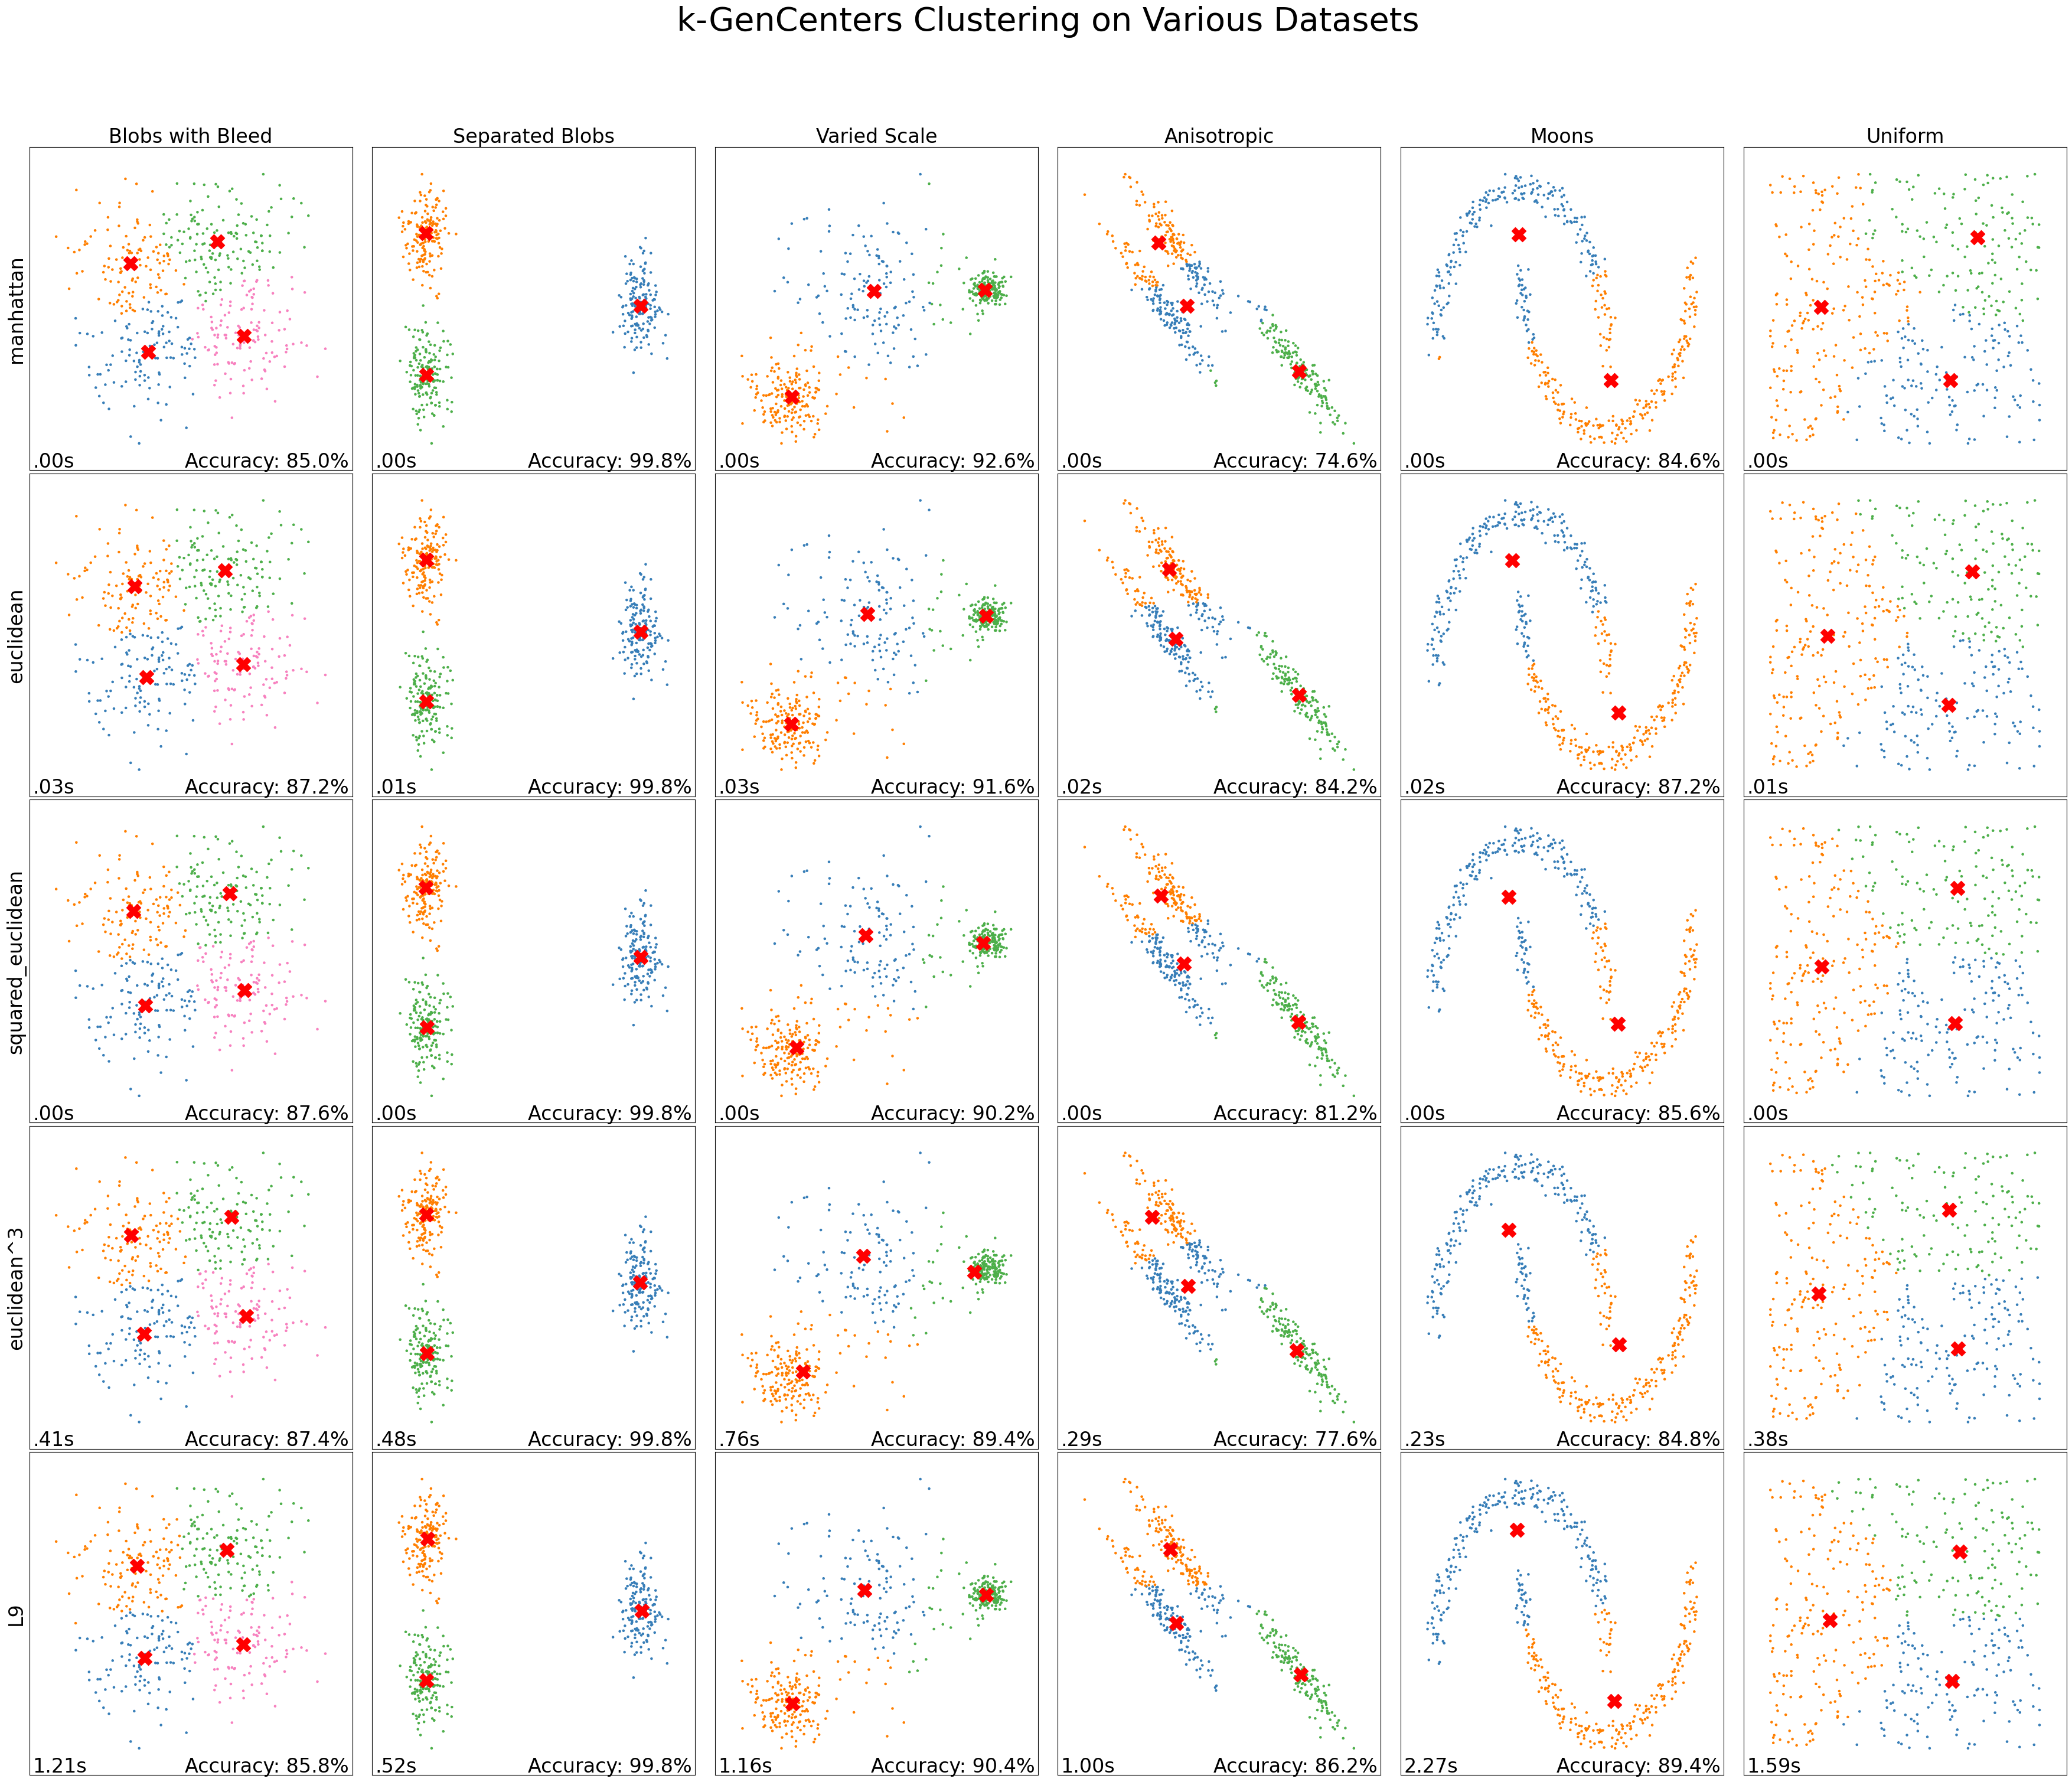

In [3]:
cost_metrics = ['manhattan', 'euclidean', 'squared_euclidean', 'euclidean^3', 'L4']  # Define cost metrics

fig_width = len(datasets) * 6  # Adjust figure size
fig_height = len(cost_metrics) * 6
fig, axes = plt.subplots(len(cost_metrics), len(datasets), figsize=(fig_width, fig_height), squeeze=False)

for i, cost_metric in enumerate(cost_metrics):
    for j, dataset in enumerate(datasets):
        X, y = dataset
        X = skpp.StandardScaler().fit_transform(X)  # Normalize dataset

        n_clusters = 3 if j in [1, 2, 3, 5] else 4 if j==0 else 2

        kgencenters = KGenCenters(n_clusters=n_clusters, init='forgy', max_iter=300, random_state=seed, verbose=False)  # Initialize and fit KGenCenters model
        t0 = time.time()
        kgencenters.fit(X, cost_metric=cost_metric, tolerance=1e-4, max_steps=100, descent_rate=0.2, max_descents=2)
        t1 = time.time()
        y_pred = kgencenters.predict(X, cost_metric=cost_metric)

        accuracy = kgencenters.evaluate(y) if y is not None else None  # Calculate accuracy if true labels are available

        ax = axes[i, j]  # Create subplot

        ax.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=5)  # Plot data points by cluster

        if hasattr(kgencenters, 'centers'):  # Plot centers if available
            centers = kgencenters.centers
            ax.scatter(centers[:, 0], centers[:, 1], s=300, c='red', zorder=10, marker='X')

        # Define plot limits and aspect ratio
        x_min, x_max = X[:, 0].min() - 0.1*(X[:, 0].max() - X[:, 0].min()), X[:, 0].max() + 0.1*(X[:, 0].max() - X[:, 0].min())
        y_min, y_max = X[:, 1].min() - 0.1*(X[:, 1].max() - X[:, 1].min()), X[:, 1].max() + 0.1*(X[:, 1].max() - X[:, 1].min())
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_aspect(abs(x_max-x_min)/abs(y_max-y_min))

        ax.set_xticks(())  # Hide x-axis ticks
        ax.set_yticks(())  # Hide y-axis ticks

        ax.text(.01, .01, ('%.2fs' % (t1 - t0)).lstrip('0'), transform=ax.transAxes, size=24, horizontalalignment='left')  # Display time taken

        if accuracy is not None:  # Display accuracy if available
            ax.text(.99, .01, ('Accuracy: %.1f%%' % (accuracy * 100)).lstrip('0'), transform=ax.transAxes, size=24, horizontalalignment='right')

        if i == 0:  # Set title for first row
            ax.set_title(dataset_names[j], size=24)

        if j == 0:  # Set ylabel for first column
            ax.set_ylabel(cost_metric, size=24, rotation='vertical')

plt.suptitle('k-GenCenters Clustering on Various Datasets', size=40, y=1.0)  # Figure title
plt.tight_layout()
plt.subplots_adjust(left=0.02, right=0.98, bottom=0.001, top=0.92, wspace=0.05, hspace=0.01)  # Adjust layout
plt.show()  # Display figure
